In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = {'training': {'total_examples': 549367, 'passed': 442846, 'failed': 106521, 'accuracy': 80, 'loss': 20},
        'test': {'total_examples': 9824, 'passed': 8096, 'failed': 17, 'accuracy': 82, 'loss': 20}}

def format_data(data, mode=None):
    if mode:
        _mode = data[mode]
        return [_mode['total_examples'], _mode['passed'], _mode['failed'], _mode['accuracy'], _mode['loss']]
    else:
        training = data['training']
        test = data['test']
        return [ ["Training", training['total_examples'], training['passed'], training['failed'], training['accuracy'], training['loss'] ],
                 ["Test", test['total_examples'], test['passed'], test['failed'], test['accuracy'], test['loss']] ]
        
def display_results(data, title):
    tabular_data = format_data(data)
    training_data = format_data(data, 'training')
    test_data = format_data(data, 'test')
    columns = ["Mode", "Total examples", "Passed", "Failed", "Accuracy", "Loss"]
    modes = ["Training", "Test"]
    subgroups = ["Passed", "Failed"]
    df = pd.DataFrame(tabular_data, columns=columns)

    fig = plt.figure(figsize=(8.5,5))

    for i in range(1):
        ax = plt.subplot2grid((2,2), (0,2*i), colspan=2)
        # Hide axes
        fig.patch.set_visible(False)
        ax.axis('off')
        ax.axis('tight')
        ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
        ax.set_title(title)
    row2 = 5
    # Define bar width and positions
    bar_width = .20
    x_positions = np.arange(1)
    for i in range(row2-1):
        ax = plt.subplot2grid((2,2*row2), (1,2*i+1), colspan=2)
        if i == 0:
            # Create bars for each subgroup
            for i, subgroup in enumerate(subgroups):
                ax.bar(x_positions + i * bar_width, training_data[i],bar_width, label=subgroup)
            # Customize the plot
            ax.set_xticks(x_positions + bar_width / 2)
            ax.set_xticklabels(["Training"])
            ax.set_ylabel('Values')
            # ax.set_title('Bar Graph with Two Independent Variables')
            # ax.legend()
        elif i == 1:
            for i, subgroup in enumerate(subgroups):
                ax.bar(x_positions + i * bar_width, test_data[i],bar_width, label=subgroup)
            # Customize the plot
            ax.set_xticks(x_positions + bar_width / 2)
            ax.set_xticklabels(["Training"])
            ax.set_ylabel('Values')
        elif i == 1:
            ax.pie([training_data[1], training_data[2]], labels=["passed", "failed"], autopct='%1.1f%%', startangle=90)
            ax.set_title('Training')
        else:
            ax.pie([test_data[1], test_data[2]], labels=["passed", "failed"], autopct='%1.1f%%', startangle=90)
            ax.set_title('Test') 
        
    # Adjust layout to prevent overlapping titles
    plt.tight_layout()
    plt.savefig(f"images/{title}.png")
    plt.show()
    plt.close()

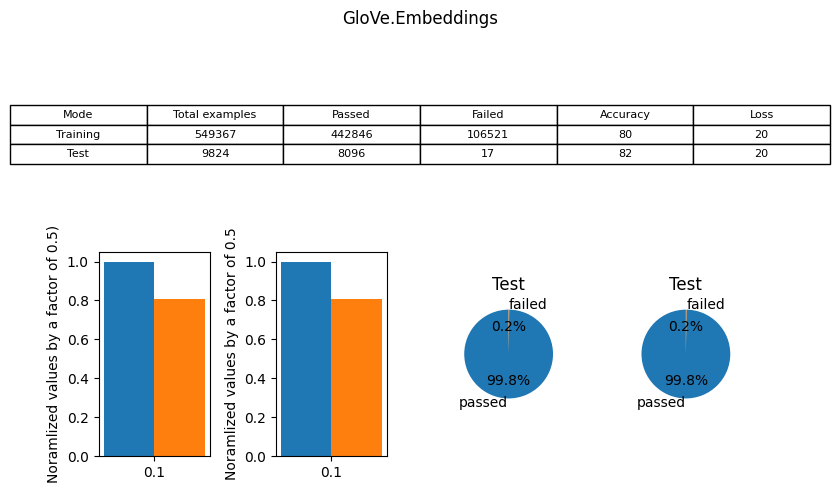

In [121]:
display_results(data, "GloVe.Embeddings")

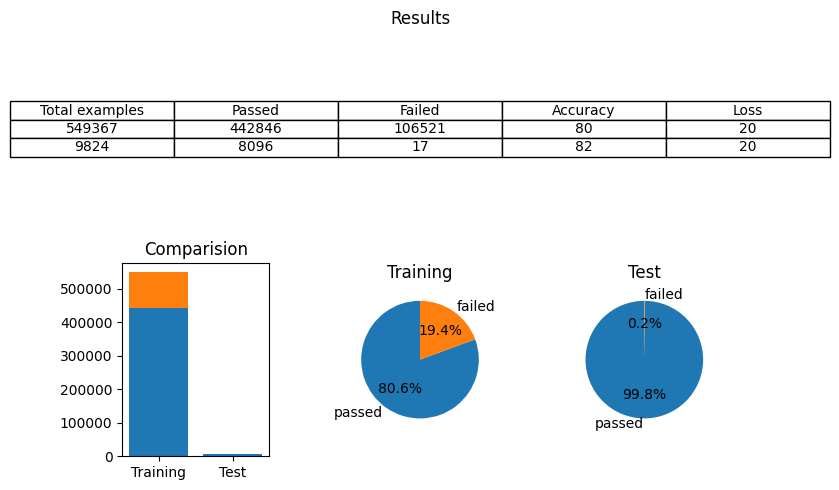

In [3]:
display_results(data, "GloVe.Embeddings")

In [4]:
bert_data = {'training': {'total_examples': 549367.0, 'passed': 434082.0, 'failed': 115285.0, 'accuracy': '0.790', 'loss': '0.521'}, 'test': {'total_examples': 9824.0, 'passed': 7662.0, 'failed': 2162.0, 'accuracy': '0.780', 'loss': '0.220'}}

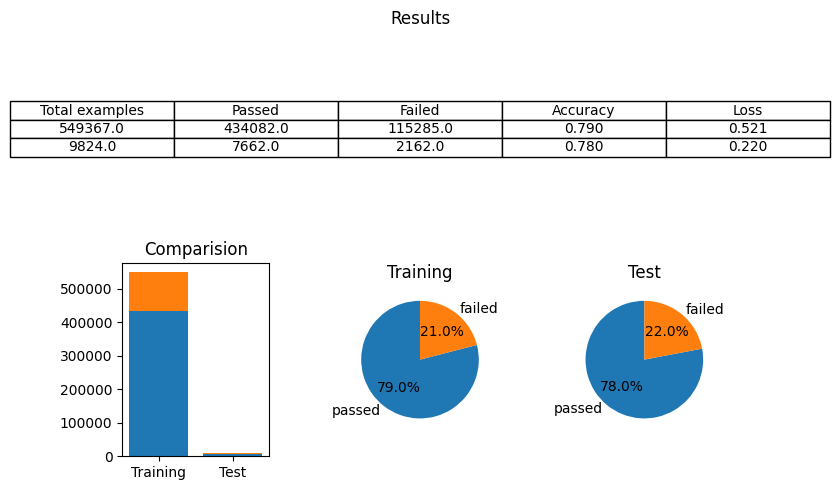

In [6]:
display_results(bert_data, "BERT.Embeddings")

In [2]:
def format_data(data, mode=None):
    if mode:
        _mode = data[mode]
        return [_mode['total_examples'], _mode['passed'], _mode['failed'], _mode['accuracy'], _mode['loss']]
    else:
        training = data['training']
        test = data['test']
        return 
        return [ ["Training", training['total_examples'], training['passed'], training['failed'], training['accuracy'], training['loss'] ],
                 ["Test", test['total_examples'], test['passed'], test['failed'], test['accuracy'], test['loss']] ]

torch.return_types.min(
values=tensor([115339.,   2183.]),
indices=tensor([1, 1]))
tensor([[434028., 115339.],
        [  7641.,   2183.]])
tensor([434028., 115339.])
tensor([7641., 2183.])
tensor([ 0.5000, 10.3661])
[ 0.5      10.366068]


C:\Users\ayyag\AppData\Local\Temp\ipykernel_27876\1742476131.py:27: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  normalized_data_np = torch.tensor([normalized_test_data[0].numpy(), normalized_test_data[1].numpy()])


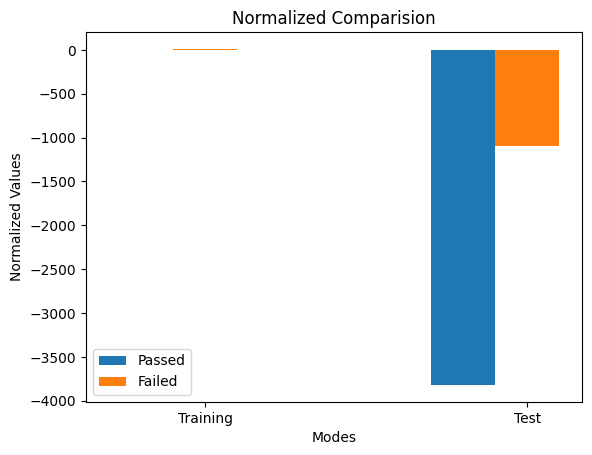

In [16]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
# data = torch.tensor([[434028, 115339], [7641, 2183]], dtype=torch.float32)
raw_data = {'training': {'total_examples': 549367.0, 'passed': 434028.0, 'failed': 115339.0, 'accuracy': '0.790', 'loss': '0.522'}, 'test': {'total_examples': 9824.0, 'passed': 7641.0, 'failed': 2183.0, 'accuracy': '0.778', 'loss': '0.222'}}
training_data = format_data(raw_data, 'training')
test_data = format_data(raw_data, 'test')
data = torch.tensor([[training_data[1], training_data[2]], [test_data[1], test_data[2]]], dtype=torch.float32)
categories = ["Passed", "Failed"]
groups = ['Training', 'Test']

# Normalize the data within each group
data_sums = torch.sum(data, dim=0)
data_mins = torch.min(data, dim=1)
data_maxs = torch.max(data, dim=1)
print(data_mins)
normalized_data = data / data_sums
print(data)
print(data[0])
print(data[1])
print(0.5 * (data[0] - data_mins[0]) / (data_maxs[0] - data_mins[0]))

normalized_test_data = [0.5 * (data[0] - data_mins[0]) / (data_maxs[0] - data_mins[0]), 0.5 * (data[1] - data_mins[1]) / (data_maxs[1] - data_mins[1])]
print(normalized_test_data[0].numpy())
normalized_data_np = torch.tensor([normalized_test_data[0].numpy(), normalized_test_data[1].numpy()])
# Convert to NumPy for Matplotlib
normalized_data_np = normalized_data_np.numpy()

# Create the bar graph
fig, ax = plt.subplots()
width = 0.2  # Width of the bars

x = np.arange(len(groups))

for i, category in enumerate(categories):
    ax.bar(x + i * width, normalized_data_np[:, i], width, label=category)

# Customize the graph
ax.set_xlabel('Modes')
ax.set_ylabel('Normalized Values')
ax.set_title('Normalized Comparision')
ax.set_xticks(x + width)
ax.set_xticklabels(groups)
ax.legend()

# Display the graph
plt.show()

[442359.0, 107008.0]
[8050.0, 1774.0]


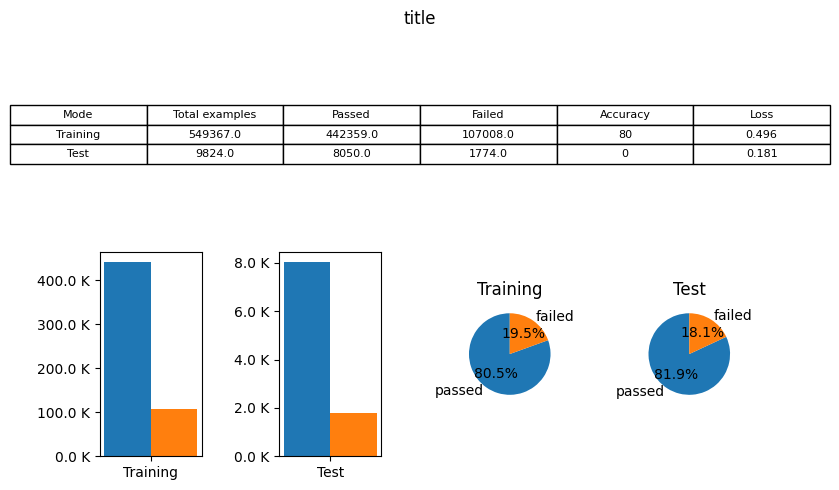

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as tkr

def format_kb(x, pos):
    """Formats the y-axis values to K."""
    return f'{x // 1000} K'
    
def format_data(data, mode=None):
    if mode:
        _mode = data[mode]
        return [_mode['total_examples'], _mode['passed'], _mode['failed'], _mode['accuracy'], _mode['loss']]
    else:
        training = data['training']
        test = data['test']
        return [ ["Training", training['total_examples'], training['passed'], training['failed'], training['accuracy'], training['loss'] ],
                 ["Test", test['total_examples'], test['passed'], test['failed'], test['accuracy'], test['loss']] ]
        
def display_results(data, title):
    tabular_data = format_data(data)
    training_data = format_data(data, 'training')
    test_data = format_data(data, 'test')
    columns = ["Mode", "Total examples", "Passed", "Failed", "Accuracy", "Loss"]
    modes = ["Training", "Test"]
    subgroups = ["Passed", "Failed"]
    df = pd.DataFrame(tabular_data, columns=columns)

    fig = plt.figure(figsize=(8.5,5))

    for i in range(1):
        ax = plt.subplot2grid((2,2), (0,2*i), colspan=2)
        # Hide axes
        fig.patch.set_visible(False)
        ax.axis('off')
        ax.axis('tight')
        ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
        ax.set_title(title)
    row2 = 5
    # Define bar width and positions
    bar_width = .20
    x_positions = np.arange(1)
    normalized_training_data = [training_data[1], training_data[2]]
    normalized_test_data = [test_data[1], test_data[2]]
    print(normalized_training_data)
    print(normalized_test_data)
    for j in range(row2-1):
        ax = plt.subplot2grid((2,2*row2), (1,2*j+1), colspan=2)
        if j == 0:
            for i, subgroup in enumerate(subgroups):
                ax.bar(x_positions + i * bar_width, normalized_training_data[i],bar_width, label=subgroup)
            ax.set_xticks(x_positions + bar_width / 2)
            ax.set_xticklabels(["Training"])
            ax.yaxis.set_major_formatter(tkr.FuncFormatter(format_kb))
        elif j == 1:
            for i, subgroup in enumerate(subgroups):
                ax.bar(x_positions + i * bar_width, normalized_test_data[i],bar_width, label=subgroup)
            # Customize the plot
            ax.set_xticks(x_positions + bar_width / 2)
            ax.set_xticklabels(["Test"])
            ax.yaxis.set_major_formatter(tkr.FuncFormatter(format_kb))
        elif j == 2:
            ax.pie([training_data[1], training_data[2]], labels=["passed", "failed"], autopct='%1.1f%%', startangle=90)
            ax.set_title('Training')
        else:
            ax.pie([test_data[1], test_data[2]], labels=["passed", "failed"], autopct='%1.1f%%', startangle=90)
            ax.set_title('Test') 
        
    # Adjust layout to prevent overlapping titles
    plt.tight_layout()
    plt.savefig(f"images/{title}.png")
    plt.show()
    plt.close()

def compare_results(glove, bert, title):
    columns = ["Embedding Type", "Total examples", "Passed", "Failed", "Accuracy", "Loss"]
    embeddings = ["GloVe", "BERT"]
    modes = ["Training", "Test"]
    subgroups = ["Passed", "Failed"]
    glove_data = format_data(glove)
    bert_data = format_data(bert)
    glove_training_data = format_data(glove_data, 'training')
    glove_test_data = format_data(glove_data, 'test')
    bert_test_data = format_data(bert_data, 'test')
    bert_training_data = format_data(bert_data, 'training')
    columns = ["Embedding Type", "Total examples", "Passed", "Failed", "Accuracy", "Loss"]
    embeddings = ["GloVe", "BERT"]
    modes = ["Training", "Test"]
    subgroups = ["Passed", "Failed"]
    
    df = pd.DataFrame(tabular_data, columns=columns)

    fig = plt.figure(figsize=(8.5,5))

    for i in range(1):
        ax = plt.subplot2grid((2,2), (0,2*i), colspan=2)
        # Hide axes
        fig.patch.set_visible(False)
        ax.axis('off')
        ax.axis('tight')
        ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
        ax.set_title(title)
    row2 = 5
    # Define bar width and positions
    bar_width = .20
    x_positions = np.arange(1)
    normalized_training_data = [training_data[1], training_data[2]]
    normalized_test_data = [test_data[1], test_data[2]]
    print(normalized_training_data)
    print(normalized_test_data)
    for j in range(row2-1):
        ax = plt.subplot2grid((2,2*row2), (1,2*j+1), colspan=2)
        if j == 0:
            for i, subgroup in enumerate(subgroups):
                ax.bar(x_positions + i * bar_width, normalized_training_data[i],bar_width, label=subgroup)
            ax.set_xticks(x_positions + bar_width / 2)
            ax.set_xticklabels(["Training"])
            ax.yaxis.set_major_formatter(tkr.FuncFormatter(format_kb))
        elif j == 1:
            for i, subgroup in enumerate(subgroups):
                ax.bar(x_positions + i * bar_width, normalized_test_data[i],bar_width, label=subgroup)
            # Customize the plot
            ax.set_xticks(x_positions + bar_width / 2)
            ax.set_xticklabels(["Test"])
            ax.yaxis.set_major_formatter(tkr.FuncFormatter(format_kb))
        elif j == 2:
            ax.pie([training_data[1], training_data[2]], labels=["passed", "failed"], autopct='%1.1f%%', startangle=90)
            ax.set_title('Training')
        else:
            ax.pie([test_data[1], test_data[2]], labels=["passed", "failed"], autopct='%1.1f%%', startangle=90)
            ax.set_title('Test') 
        
    # Adjust layout to prevent overlapping titles
    plt.tight_layout()
    plt.savefig(f"images/{title}.png")
    plt.show()
    plt.close()
    
display_results({'training': {'total_examples': 549367.0, 'passed': 442359.0, 'failed': 107008.0, 'accuracy': 80, 'loss': '0.496'}, 'test': {'total_examples': 9824.0, 'passed': 8050.0, 'failed': 1774.0, 'accuracy': 0, 'loss': '0.181'}}, "title")
